In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

Read the data

In [16]:
coin_vals = np.array([x for x in next(os.walk('data'))[1] if x[0] != '.'])

X = []
y = []

for val in coin_vals:
    path = os.path.join('data', val, 'out')
    for file in os.listdir(path):
        imgdata = plt.imread(os.path.join(path, file))[:,:,0]
        if imgdata.shape != (100, 100):
            print(file)
        X.append(imgdata)
        y.append(coin_vals == val)

Xtrain = np.reshape(np.array(X), [-1, 100, 100, 1])
ytrain = np.array(y, dtype=np.float32)


0-1-back2.png-150.png
0-1-back2.png-330.png
0-1-back.png-350.png
0-1-back.png-40.png
0-1-back.png-310.png
0-1-back.png-140.png
0-1-back2.png-120.png
0-1-back2.png-200.png
0-1-back2.png-170.png
0-1-back2.png-250.png
0-1-back2.png-90.png
0-1-back2.png-130.png
0-1-back.png-90.png
0-1-back.png-330.png
0-1-back2.png-190.png
0-1-back2.png-260.png
0-1-back.png-80.png
0-1-back2.png-10.png
0-1-back.png-160.png
0-1-back.png-300.png
0-1-back2.png-70.png
0-1-back.png-340.png
0-1-back.png-20.png
0-1-back.png-320.png
0-1-back.png-240.png
0-1-back2.png-30.png
0-1-back.png-110.png
0-1-back2.png-20.png
0-1-back.png-270.png
0-1-back.png-100.png
0-1-back.png-190.png
0-1-back.png-120.png
0-1-back.png-130.png
0-1-back.png-60.png
0-1-back2.png-300.png
0-1-back2.png-320.png
0-1-back2.png-50.png
0-1-back2.png-40.png
0-1-back2.png-340.png
0-1-back2.png-350.png
0-1-back.png-220.png
0-1-back.png-280.png
0-1-back.png-170.png
0-1-back.png-210.png
0-1-back2.png-310.png
0-1-back2.png-240.png
0-1-back.png-30.png
0-1-

ValueError: cannot reshape array of size 2592 into shape (100,100,1)

Create our model

In [ ]:
l2_lambda = 0.01

sess = tf.Session()

x = tf.placeholder(tf.float32, [None, 100, 100, 1])
y_ = tf.placeholder(tf.float32, [None, 9])
keep_prob = tf.placeholder_with_default(1.0, None)

W1 = tf.Variable(tf.truncated_normal([3, 3, 1, 10], stddev=0.3))
b1 = tf.Variable(tf.constant(0.3 * np.ones([50, 50, 10]), dtype=tf.float32))

W2 = tf.Variable(tf.truncated_normal([3, 3, 10, 12], stddev=0.3))
b2 = tf.Variable(tf.constant(0.3 * np.ones([25, 25, 12]), dtype=tf.float32))

W3 = tf.Variable(tf.truncated_normal([12*12*12, 9], stddev=0.3))
b3 = tf.Variable(tf.constant(0.3 * np.ones([9]), dtype=tf.float32))

def pipeline(x):
    h1 = x
    h1 = tf.nn.max_pool(h1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    h1 = tf.nn.conv2d(h1, W1, [1, 1, 1, 1], 'SAME') + b1
    h1 = tf.nn.relu(h1)
    h1 = tf.nn.dropout(h1, keep_prob)

    h2 = tf.nn.max_pool(h1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    h2 = tf.nn.conv2d(h2, W2, [1, 1, 1, 1], 'SAME') + b2
    h2 = tf.nn.relu(h2)
    h2 = tf.nn.dropout(h2, keep_prob)

    out = tf.nn.max_pool(h2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    out = tf.reshape(out, [-1, 12*12*12])
    out = tf.matmul(out, W3) + b3

    return out

y = pipeline(x)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)) +\
       l2_lambda * tf.add_n([tf.nn.l2_loss(x) for x in [W1, W2, W3]])
train_task = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

Train & test the model

In [4]:
batch_size = 200

sess.run(tf.global_variables_initializer())

data_len = len(X)
perm = np.random.permutation(range(data_len))

train_set = perm[0:(data_len * 8 // 10)]
test_set = perm[(data_len * 8 // 10):(data_len * 9 // 10)]
val_set = perm[(data_len * 9 // 10):]

for epoch in range(1000):
    batch = np.random.permutation(train_set)[:batch_size]
    X_in = Xtrain[batch]
    y_in = ytrain[batch]
    sess.run(train_task, {x: X_in, y_: y_in, keep_prob: 0.9})
    if epoch % 50 == 0:
        test_X = Xtrain[test_set]
        test_y = ytrain[test_set]
        print("Test set accuracy", np.mean(np.argmax(sess.run(y, {x: test_X}), 1) == np.argmax(test_y, 1)))
        
val_X = Xtrain[test_set]
val_y = ytrain[test_set]

print("Validation set accuracy", np.mean(np.argmax(sess.run(y, {x: val_X}), 1) == np.argmax(val_y, 1)))

Test set accuracy 0.192052980132
Test set accuracy 0.23178807947
Test set accuracy 0.225165562914
Test set accuracy 0.218543046358
Test set accuracy 0.258278145695
Test set accuracy 0.291390728477
Test set accuracy 0.403973509934
Test set accuracy 0.417218543046
Test set accuracy 0.523178807947
Test set accuracy 0.649006622517
Test set accuracy 0.655629139073
Test set accuracy 0.675496688742
Test set accuracy 0.781456953642
Test set accuracy 0.880794701987
Test set accuracy 0.894039735099
Test set accuracy 0.913907284768
Test set accuracy 0.913907284768
Test set accuracy 0.960264900662
Test set accuracy 0.953642384106
Test set accuracy 0.973509933775
Validation set accuracy 0.966887417219


Try different images

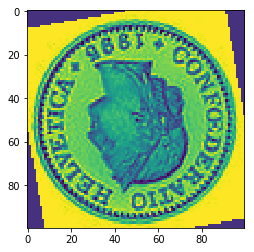

In [5]:
%matplotlib inline
plt.imshow(np.reshape(X_in[14], [100, 100]))

0.0740740740741


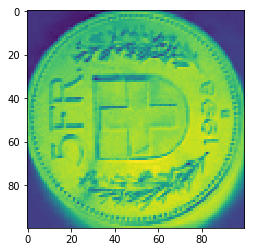

In [24]:
imgdata1 = plt.imread('/home/nikos/5front.jpg')
imgdata1 = 1-np.reshape(np.mean(imgdata1, 2), [100, 100, 1]) / 252
plt.imshow(np.reshape(imgdata1, [100, 100]))
print(np.min(imgdata1[:]))

In [25]:
%matplotlib inline
guess = sess.run(tf.argmax(y, 1), {x: [imgdata1]})[0]
print('Guess is {} francs'.format(coin_vals[guess] / 100))

Guess is 1.0 francs


In [4]:
[x for x in next(os.walk('data'))[1] if x[0] != '.']

['50c_1fr_2fr', '5c_10c_20c', '1fr', '20c', '10c', '2fr', '5c', '5fr', '50c']